<a href="https://www.kaggle.com/code/moemnelhalose/flightprice?scriptVersionId=139329792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Question

Does data include outliers or no?

Where are outliers in numerical?

Ease My Trip website gain from airline?

airline largest income prices?

Airline prices books based on any feature?

what is the ratio between Economy and Business in class?

How does the ticket price vary between Economy and Business class?

How does the ticket price vary days_left?

How does the ticket price vary stop_days?

How does the ticket price vary between source and destionation?

How does the ticket price vary between arrival and departure_time ?

Depending on the correlation matrix, which variables have a strong relationship with each other?

# DATA COLLECTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website. from the website Easemytrip for flight travel between India's top 6 metro cities. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.

## Feature
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

# import library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

data is not null

## Cleaning Data

In [5]:
df = data.copy()

In [6]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
df=df.drop("Unnamed: 0", axis = 1)

## Information from data

In [8]:
for col in list(df.columns):
    print("\nfor column : ", col,"\n")
    print(df[col].value_counts())


for column :  airline 

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

for column :  flight 

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

for column :  source_city 

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

for column :  departure_time 

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

for column :  stops 

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

for column :  arrival_time 

Night            91538
Evening          78323
Morning        

### Does data include outliers or no 

In [9]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


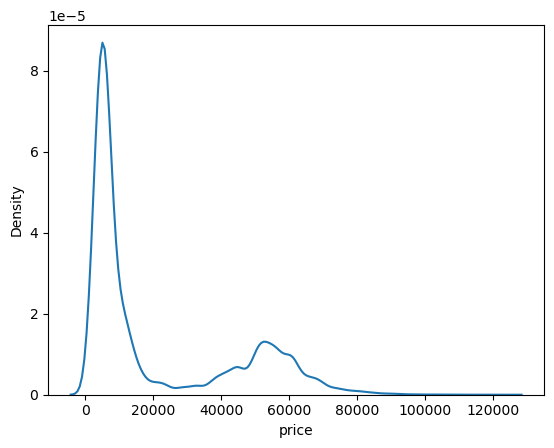

In [10]:
dst=sns.kdeplot(data=data,x="price")

Price:Right-sekwed====> median<mean

outliers:<90000


### Where are outliers in numerical?

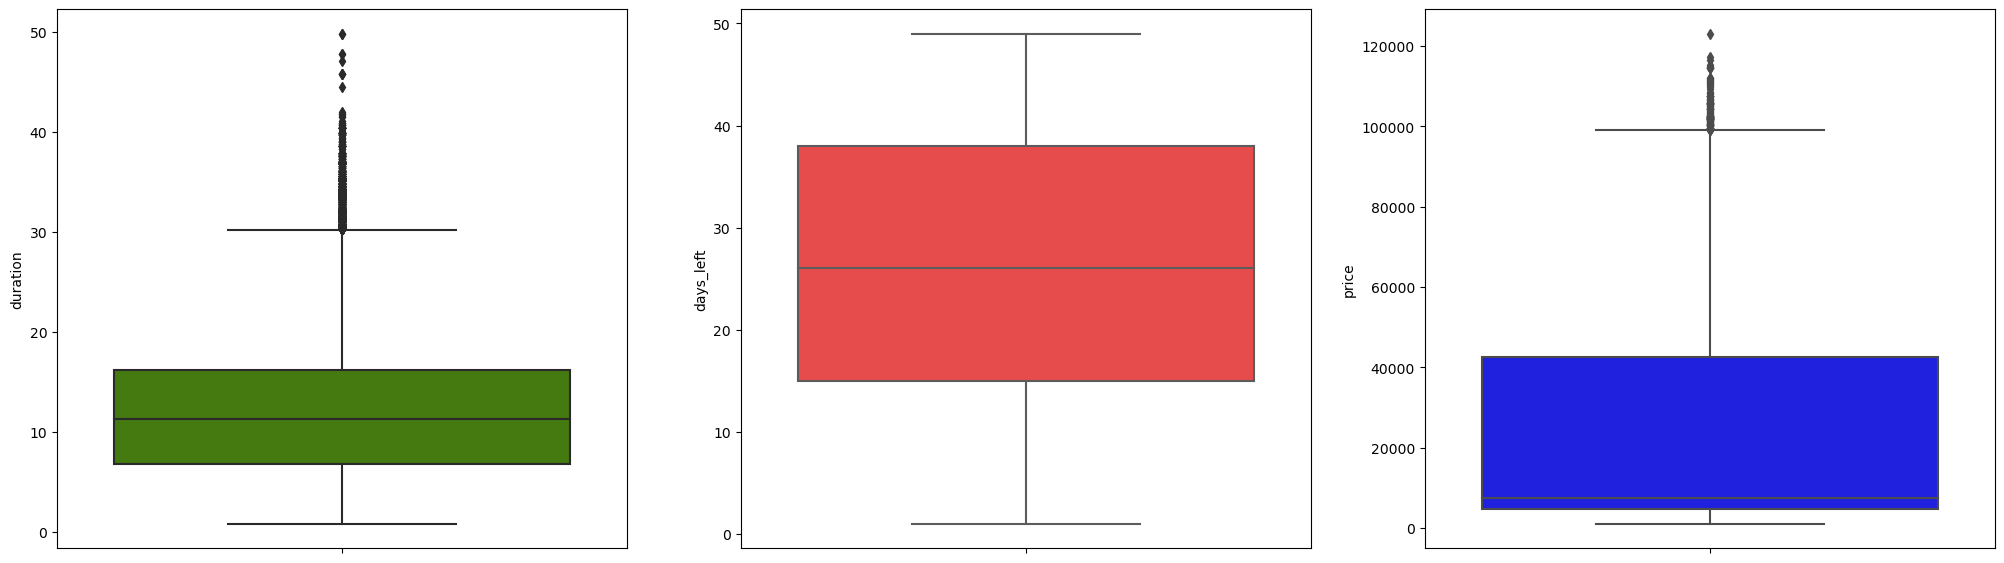

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,7))
sns.boxplot(data=data, y="duration" , color ='#458B00' , ax = ax1)
sns.boxplot(data=data, y="days_left" , color ='#FF3333', ax = ax2)
sns.boxplot(data=data, y="price" , color ='#0000FF', ax = ax3)
plt.show()

`Duration` and `price` are outliers

In [12]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [13]:
data.shape

(300153, 12)

### Ease My Trip website gain from airline


In [14]:
pd.DataFrame(data["airline"].value_counts())/300153*100

,airline
Vistara,42.597942
Air_India,26.950255
Indigo,14.366007
GO_FIRST,7.720396
AirAsia,5.363265
SpiceJet,3.002136


`Vistara` 42% is gain to website

### what is type class

In [15]:
pd.DataFrame(df["class"]).drop_duplicates('class')

,class
0,Economy
206666,Business


### info to business_class

In [16]:
pd.DataFrame(df["class"]).drop_duplicates('class')

,class
0,Economy
206666,Business


In [17]:
bus=pd.read_csv("/kaggle/input/flight-price-prediction/business.csv")

In [18]:
for col in list(bus.columns):
    print("\nfor column : ", col,"\n")
    print(bus[col].value_counts())


for column :  date 

07-03-2022    2062
14-03-2022    2050
28-02-2022    2049
21-03-2022    2049
21-02-2022    2036
22-03-2022    2016
15-03-2022    2015
09-03-2022    2010
08-03-2022    2010
23-03-2022    2007
10-03-2022    2003
16-03-2022    1996
24-03-2022    1995
18-03-2022    1992
02-03-2022    1990
19-03-2022    1986
06-03-2022    1986
13-03-2022    1984
25-03-2022    1981
11-03-2022    1981
01-03-2022    1981
12-03-2022    1980
20-03-2022    1980
04-03-2022    1979
22-02-2022    1972
05-03-2022    1971
03-03-2022    1971
23-02-2022    1965
26-03-2022    1960
17-02-2022    1958
19-02-2022    1956
25-02-2022    1956
27-02-2022    1956
24-02-2022    1953
27-03-2022    1951
18-02-2022    1945
20-02-2022    1945
26-02-2022    1943
28-03-2022    1934
16-02-2022    1926
17-03-2022    1910
15-02-2022    1903
31-03-2022    1890
30-03-2022    1853
29-03-2022    1790
14-02-2022    1665
13-02-2022    1424
12-02-2022    1406
11-02-2022     266
Name: date, dtype: int64

for column :  airline

In [19]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [20]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


### info to Economy_class

In [21]:
eco=pd.read_csv("/kaggle/input/flight-price-prediction/economy.csv")

In [22]:
for col in list(eco.columns):
    print("\nfor column : ", col,"\n")
    print(eco[col].value_counts())


for column :  date 

07-03-2022    4571
08-03-2022    4567
01-03-2022    4560
06-03-2022    4557
28-02-2022    4554
13-03-2022    4552
21-03-2022    4545
14-03-2022    4536
20-03-2022    4533
12-03-2022    4525
10-03-2022    4524
15-03-2022    4521
23-03-2022    4519
22-03-2022    4519
04-03-2022    4516
02-03-2022    4512
03-03-2022    4512
24-03-2022    4508
18-03-2022    4499
19-03-2022    4494
25-03-2022    4492
26-03-2022    4480
27-02-2022    4464
23-02-2022    4439
05-03-2022    4434
11-03-2022    4417
16-03-2022    4416
22-02-2022    4413
24-02-2022    4400
25-02-2022    4386
17-03-2022    4386
21-02-2022    4382
27-03-2022    4363
09-03-2022    4351
26-02-2022    4336
29-03-2022    4282
31-03-2022    4267
28-03-2022    4226
30-03-2022    4225
20-02-2022    3878
18-02-2022    3823
16-02-2022    3814
17-02-2022    3745
19-02-2022    3713
15-02-2022    3492
14-02-2022    3414
13-02-2022    2826
12-02-2022    2625
11-02-2022    1661
Name: date, dtype: int64

for column :  airline

In [23]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [24]:
eco.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [25]:
eco["airline"].drop_duplicates()

0          SpiceJet
2           AirAsia
3           Vistara
8          GO FIRST
12           Indigo
16        Air India
71637        Trujet
109730      StarAir
Name: airline, dtype: object

In [26]:
pd.DataFrame(eco["ch_code"]).drop_duplicates("ch_code")

,ch_code
0,SG
2,I5
3,UK
8,G8
12,6E
16,AI
71637,2T
109730,S5


# Data visualization


In [27]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [29]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


##  airline largest  income prices 


### conver airline category to numerical 


In [30]:
df['airline'].replace("Vistara" , 0, inplace = True)
df['airline'].replace("Air_India" ,1 , inplace = True)
df['airline'].replace("Indigo" , 2 , inplace = True)
df['airline'].replace("GO_FIRST" , 3 , inplace = True)
df['airline'].replace("AirAsia" , 4 , inplace = True)
df['airline'].replace("SpiceJet" , 5 , inplace = True)


In [31]:
df['airline'].value_counts()

0    127859
1     80892
2     43120
3     23173
4     16098
5      9011
Name: airline, dtype: int64

Text(0.5, 1.0, 'airline vs price')

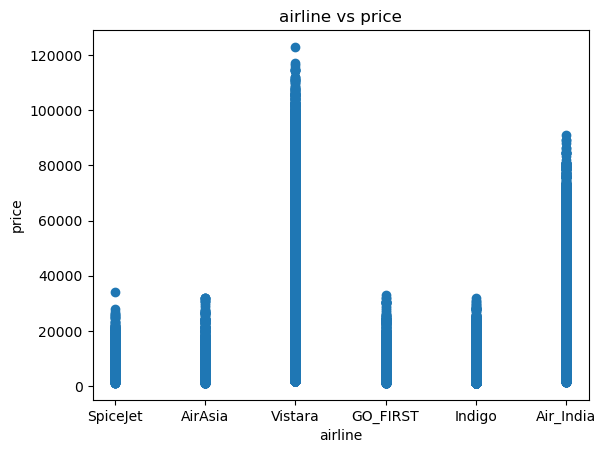

In [32]:
plt.scatter(data['airline'], data['price'],) 
plt.xlabel("airline")
plt.ylabel("price")
plt.title("airline vs price")

In [33]:
df.groupby(["airline"]).sum().sort_values("price",ascending=False)[["price"]]

/tmp/ipykernel_20/3635582149.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["airline"]).sum().sort_values("price",ascending=False)[["price"]]


,price
airline,
0,3886470735
1,1901529790
2,229580207
3,130973972
4,65858089
5,55681482


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


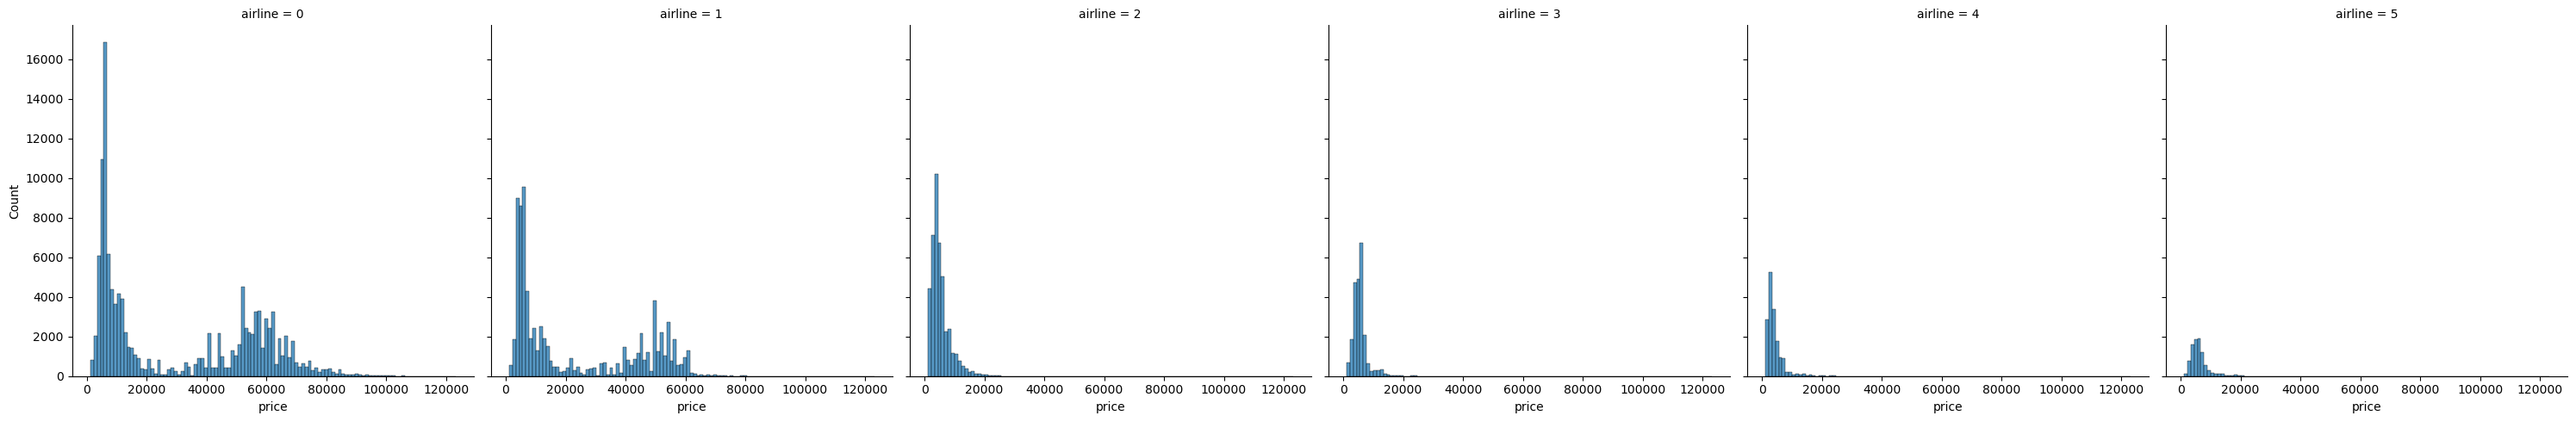

In [34]:
sns.displot(data=df, x="price", col="airline")

`Vistara` The largest airline in the source of income


## Any different feature in airlines numerical

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


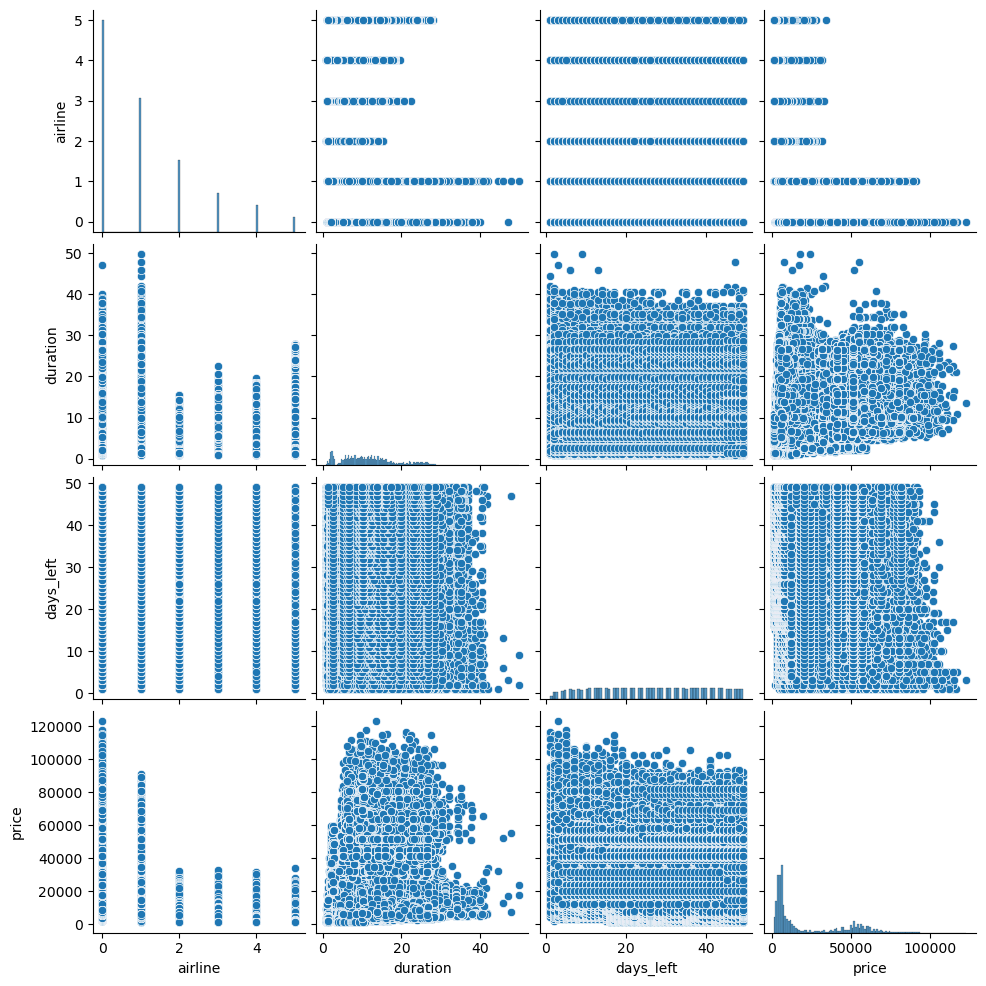

In [35]:
sns.pairplot(df)

all airline same  `days_left`
but days_left is vary prices


dutration is not same in airlines 



## Airline prices books based on any feature


# class


## what is the ratio between Economy and Business in class?


In [36]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [37]:
eco.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [38]:
data.shape

(300153, 12)

In [39]:
class_diff = data.groupby(['class','airline']).count()[['price']]/300153*100
class_diff

price
class    airline             
Business Air_India  10.960410
         Vistara    20.186038
Economy  AirAsia     5.363265
         Air_India  15.989845
         GO_FIRST    7.720396
         Indigo     14.366007
         SpiceJet    3.002136
         Vistara    22.411903

In [40]:
eco["price"].agg(["min" , 'max'])

min    1,105
max    9,999
Name: price, dtype: object

In [41]:
bus["price"].agg(["min" , 'max'])

min    1,00,111
max      99,680
Name: price, dtype: object

<Axes: ylabel='class'>

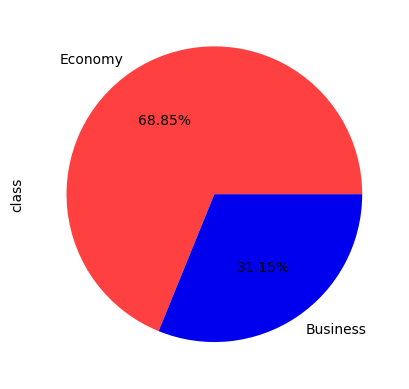

In [42]:
round(data['class'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.2f%%" , colors = ["#FF4040" , "#0000EE"] )

economy > busniess in  price  income

Vistara is largest in price in economy

``1-Class affect price ``
Business_Class are the largest the economy_Class in prices

# Days_left

## How does the ticket price vary days_left


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


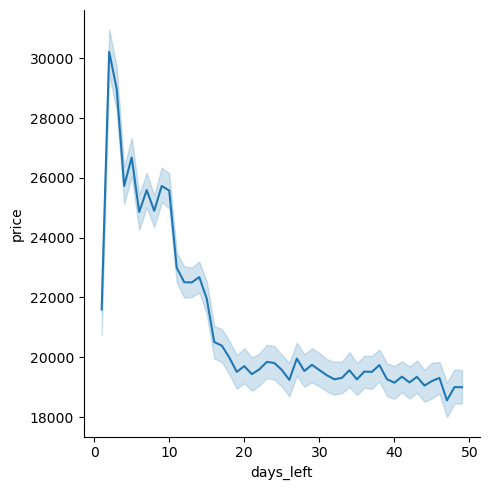

In [43]:
sns.relplot(
    data=df, kind="line",
    x="days_left", y="price"
)

In [44]:
df.groupby(["days_left"]).mean().sort_values("days_left",ascending=True)[["price"]][:10]

/tmp/ipykernel_20/1055346600.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["days_left"]).mean().sort_values("days_left",ascending=True)[["price"]][:10]


,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


``2-days_left is not affect prices`` some days between 10 to 20 day Cheaper from days 1 to 9

# Stop_Days


## How does the ticket price vary stop_days?

In [45]:
df.groupby(["stops"]).mean().sort_values("price",ascending=False)[["price"]]

/tmp/ipykernel_20/2517235187.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["stops"]).mean().sort_values("price",ascending=False)[["price"]]


,price
stops,
one,22900.992482
two_or_more,14113.450775
zero,9375.938535


<Axes: xlabel='stops'>

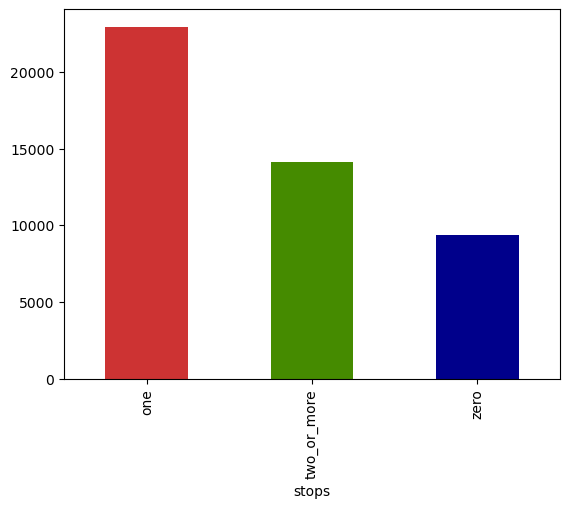

In [46]:
df.groupby("stops")['price'].mean().plot.bar(  color = ["#CD3333" , '#458B00' , '#00008B'] )


``3-Stops is affect price`` price one > (zero) and (two or more)

# source and destionation citiy


## How does the ticket price vary between source and destionation?

In [47]:
df.groupby("destination_city")['price'].sum().sort_values(ascending=False)

destination_city
Mumbai       1263052374
Bangalore    1102760134
Kolkata      1087744724
Delhi        1057533005
Chennai       886211782
Hyderabad     872792256
Name: price, dtype: int64

<Axes: xlabel='destination_city', ylabel='price'>

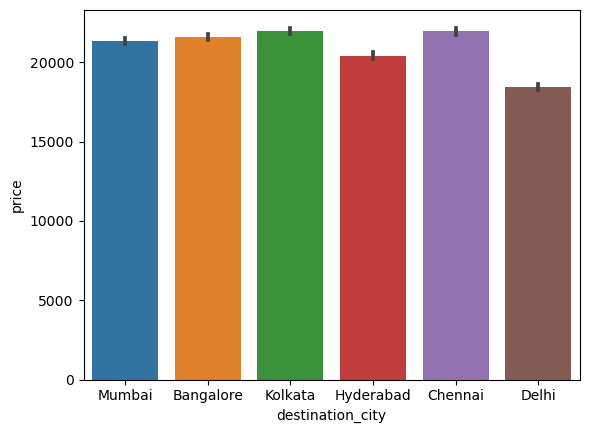

In [48]:
sns.barplot(x='destination_city',y='price',data=df)

<Axes: xlabel='source_city', ylabel='price'>

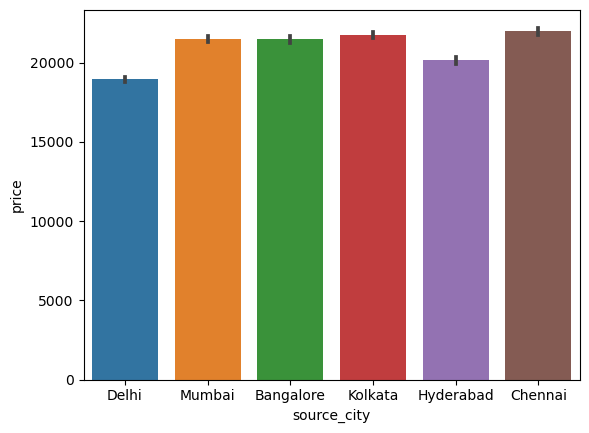

In [49]:
sns.barplot(x='source_city',y='price',data=df)


```4-Source and destination``` affect prices

# arrival and departure_time

## How does the ticket price vary between arrival  and departure_time	?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


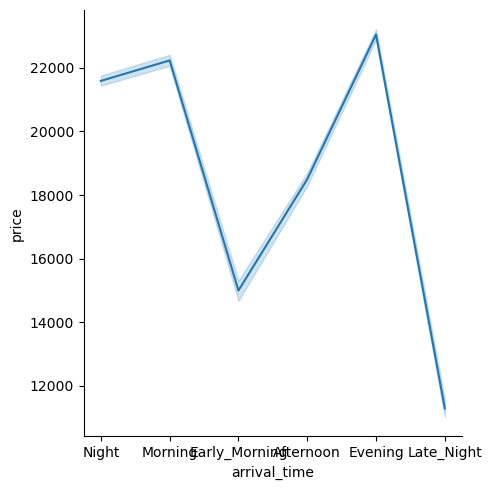

In [50]:
sns.relplot(
    data=df, kind="line",
    x="arrival_time", y="price"
)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


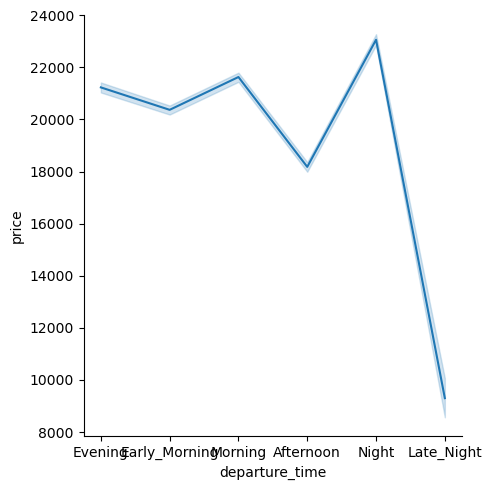

In [51]:
# departure_time
sns.relplot(
    data=df, kind="line",
    x="departure_time", y="price"
)

## Depending on the correlation matrix, which variables have a strong relationship with each other?

In [52]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,airline,duration,days_left,price
airline,1.000000,-0.248911,0.019514,-0.428303
duration,-0.248911,1.000000,-0.039157,0.204222
days_left,0.019514,-0.039157,1.000000,-0.091949
price,-0.428303,0.204222,-0.091949,1.000000


/tmp/ipykernel_20/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

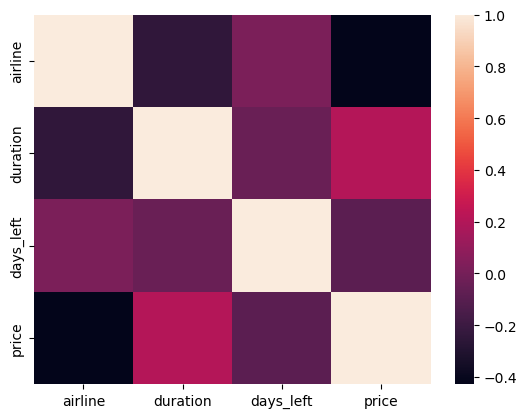

In [53]:
sns.heatmap(df.corr())

# Conclustion 

<h4><b>feature vary preice:</b></h4>

    -airline
    -class
    -stop
    -Source and destination
    -time
    